# Import Library, Load Data

## LSTM2 > LSTM3

LSTM 3에서는 내일의 날씨를 함께 학습시킵니다.

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import pandas as pd
from pandas import DataFrame, Series

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_init = pd.read_csv('coffee_weather_janghoo.csv')
df_init = df_init.drop(['weather_mintemp', 'weather_maxwindspeed', 'weather_mintemp'], axis = 1)
df_weather_columns = df_init.iloc[:, 6:]
df_init.head()

,datetime,americano,cafelatte,cafemoca,caramelmatk,icedamericano,weather_avgtemp,weather_avgmoist,weather_avgwindspeed,weather_rain,weather_maxtemp
0,2016-06-24,35.18592,23.27069,15.43382,26.34946,9.55617,22.548148,80.461538,1.544444,5.124074,26.216667
1,2016-06-25,33.22670,23.75049,15.55377,25.54978,8.91643,22.292593,67.897436,2.177778,0.037037,27.259259
2,2016-06-26,36.98520,26.30947,17.15313,27.38904,11.07556,23.737037,64.256410,1.805556,0.000000,30.659259
3,2016-06-27,37.26509,24.39024,14.51419,25.26989,11.07556,23.538889,65.205128,1.114815,0.000000,29.077778
4,2016-06-28,37.18512,23.23070,14.19432,24.99000,12.23510,24.062963,65.205128,1.287037,0.000000,30.133333


In [5]:
df_weather_columns.head()

,weather_avgtemp,weather_avgmoist,weather_avgwindspeed,weather_rain,weather_maxtemp
0,22.548148,80.461538,1.544444,5.124074,26.216667
1,22.292593,67.897436,2.177778,0.037037,27.259259
2,23.737037,64.256410,1.805556,0.000000,30.659259
3,23.538889,65.205128,1.114815,0.000000,29.077778
4,24.062963,65.205128,1.287037,0.000000,30.133333


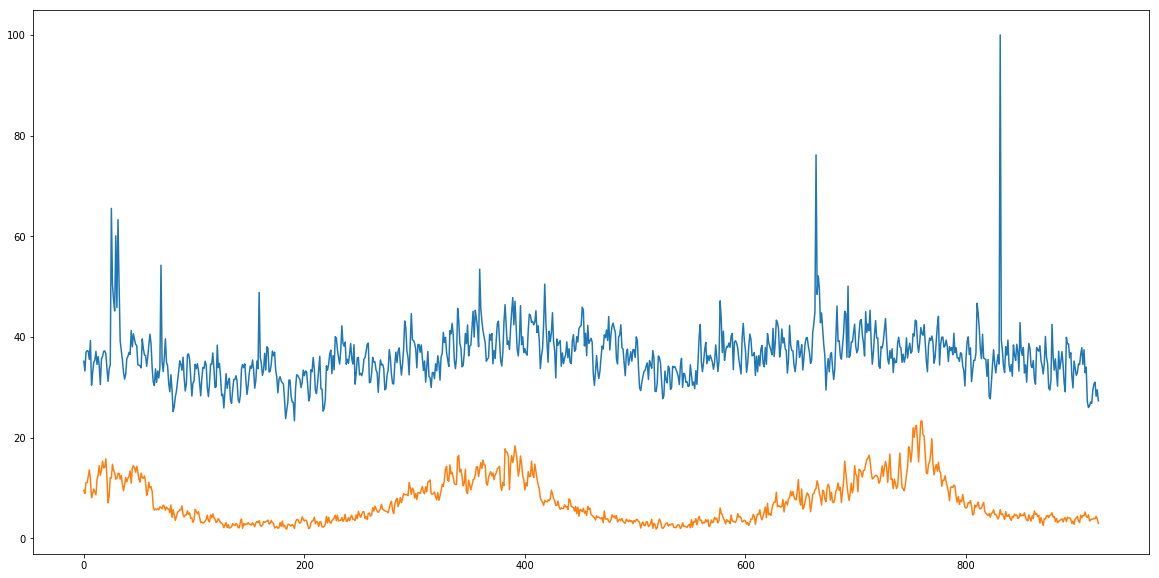

In [6]:
df_americano_and_icedamericano = df_init.drop(['caramelmatk', 'cafemoca', 'cafelatte'],axis = 1)
df_caffelatte_and_americano = df_init.drop(['caramelmatk', 'cafemoca', 'icedamericano'], axis = 1)


df_americano_and_icedamericano.head()

plt.figure(figsize = [20,10])
plt.plot(df_americano_and_icedamericano.iloc[:, 1:3])

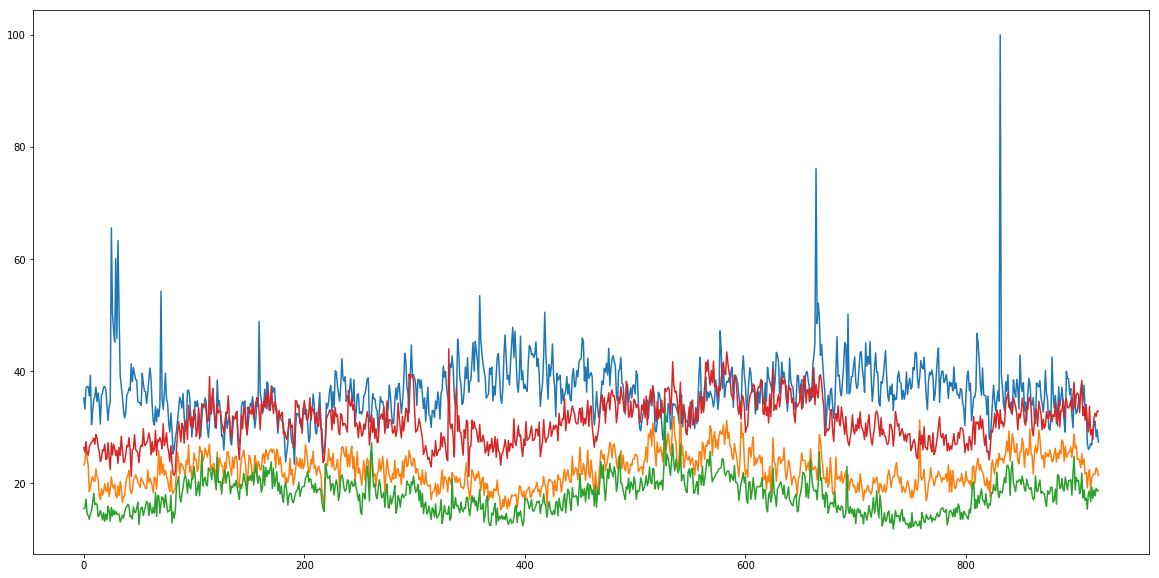

In [7]:
plt.figure(figsize = [20,10])
plt.plot(df_init.iloc[:, 1:5])

# Model

In [8]:
# 1. RNN
# 2. LSTM

## Hyper parameters

In [9]:
#about X
timesteps = sequence_length = 7
data_dim = 5

#about Y and hidden size
hidden_layer_size = 3
hidden_dim = 10
output_dim = 1

#about training
learning_rate = 0.01
epoch = 1


def set_activation_function(string):
    if string == 'tanh' :
        return tf.tanh, string
    elif string == 'relu' :
        return tf.nn.relu, string
    elif string == 'lrelu' :
        return tf.nn.leaky_relu, string

#activation function
activation_function, activation_functionname = set_activation_function('lrelu') #relu
activation_function, activation_functionname

(<function tensorflow.python.ops.nn_ops.leaky_relu(features, alpha=0.2, name=None)>,
 'lrelu')

<h4>Kinds of Hyper parameters</h4>

- timesteps : <br>
- data_dim : data dimension <br>
- hidden_layer_size <br>
- hidden_dim = hidden_dimension <br>
    - https://stackoverflow.com/questions/37901047/what-is-num-units-in-tensorflow-basiclstmcell <br>
    - more hidden dimension, more memorize <br>
    
    


## Data Pre-Processing

In [10]:
#df_xy = df_americano_and_icedamericano.iloc[:,1:]
df_xy = pd.concat([df_weather_columns, df_init['icedamericano']], axis = 1)
np_xy = df_xy.to_numpy()
batch_size = np_size = len(np_xy)
np_xy

array([[ 2.25481481e+01,  8.04615385e+01,  1.54444444e+00,
         5.12407407e+00,  2.62166667e+01,  9.55617000e+00],
       [ 2.22925926e+01,  6.78974359e+01,  2.17777778e+00,
         3.70370370e-02,  2.72592593e+01,  8.91643000e+00],
       [ 2.37370370e+01,  6.42564103e+01,  1.80555556e+00,
         0.00000000e+00,  3.06592593e+01,  1.10755600e+01],
       ...,
       [-7.29245283e+00,  3.36410256e+01,  2.25660377e+00,
         0.00000000e+00, -2.85094340e+00,  4.35825000e+00],
       [-7.72641509e+00,  4.64615385e+01,  1.08113207e+00,
         0.00000000e+00, -1.74339623e+00,  3.83846000e+00],
       [-6.20377359e+00,  5.05641026e+01,  9.84905660e-01,
         0.00000000e+00,  6.22641510e-02,  2.95881000e+00]])

In [11]:
df_xy.head(9)

,weather_avgtemp,weather_avgmoist,weather_avgwindspeed,weather_rain,weather_maxtemp,icedamericano
0,22.548148,80.461538,1.544444,5.124074,26.216667,9.55617
1,22.292593,67.897436,2.177778,0.037037,27.259259,8.91643
2,23.737037,64.256410,1.805556,0.000000,30.659259,11.07556
3,23.538889,65.205128,1.114815,0.000000,29.077778,11.07556
4,24.062963,65.205128,1.287037,0.000000,30.133333,12.23510
5,24.677778,64.820513,1.709259,0.000000,30.303704,13.59456
6,24.351852,80.358974,1.870370,0.962963,27.905556,11.79528
7,23.881481,87.461538,1.814815,100.666667,27.348148,8.07676
8,23.435185,81.615385,1.694444,2.683333,27.788889,8.87644


In [12]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


def StandardScaler(data):
#    avg = []
#    for i in range(0, np_xy[0], 1) :
#        np.mean(np_xy[:,i])
    avg = np.mean(np_xy, axis = 0)
    std = np.std(np_xy, axis = 0)
    
    final = (data - avg) / std
    
    return final




#scaled_np_xy = MinMaxScaler(np_xy)
scaled_np_xy = StandardScaler(np_xy)

#scaled_np_xy = np_xy #just for test

scaled_np_xy

array([[ 0.8466481 ,  1.12872705,  0.02319154,  0.15854079,  0.68120671,
         0.57899985],
       [ 0.82320154,  0.27196874,  1.23912125, -0.27339971,  0.77539438,
         0.4293087 ],
       [ 0.95572555,  0.02368368,  0.5244959 , -0.27654453,  1.08254992,
         0.93451807],
       ...,
       [-1.89114912, -2.064009  ,  1.39045842, -0.27654453, -1.94475721,
        -0.63724832],
       [-1.93096403, -1.18976583, -0.86631679, -0.27654453, -1.84470155,
        -0.75887266],
       [-1.79126564, -0.91000802, -1.05106083, -0.27654453, -1.68157844,
        -0.96469974]])

In [13]:
# train/test split
train_size = int(len(scaled_np_xy) * 0.7)
train_set = scaled_np_xy[0:train_size]
test_set = scaled_np_xy[train_size - sequence_length:]
print('size : ', train_size)
# Index from [train_size - seq_length] to utilize past sequence

size :  644


In [14]:
# build datasets
def build_dataset(time_series, seq_length): # seq_length : count of time series (timesteps)
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length - 1): # 7개씩 묶는 과정
        _x = time_series[i : i + seq_length, :-1]
        _y = time_series[i + seq_length -1 ,  -1]  # Next close
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, sequence_length)
testX, testY   = build_dataset(test_set , sequence_length)
#testX, testY = build_dataset(scaled_np_xy, sequence_length) #just full trial

[[ 0.8466481   1.12872705  0.02319154  0.15854079  0.68120671]
 [ 0.82320154  0.27196874  1.23912125 -0.27339971  0.77539438]
 [ 0.95572555  0.02368368  0.5244959  -0.27654453  1.08254992]
 [ 0.93754597  0.08837768 -0.80164967 -0.27654453  0.9396791 ]
 [ 0.9856284   0.08837768 -0.47100212 -0.27654453  1.03503784]
 [ 1.04203605  0.06215038  0.33961769 -0.27654453  1.05042908]
 [ 1.0121332   1.1217331   0.64893315 -0.19477931  0.8337807 ]] -> 1.1029235350641615
[[ 0.82320154  0.27196874  1.23912125 -0.27339971  0.77539438]
 [ 0.95572555  0.02368368  0.5244959  -0.27654453  1.08254992]
 [ 0.93754597  0.08837768 -0.80164967 -0.27654453  0.9396791 ]
 [ 0.9856284   0.08837768 -0.47100212 -0.27654453  1.03503784]
 [ 1.04203605  0.06215038  0.33961769 -0.27654453  1.05042908]
 [ 1.0121332   1.1217331   0.64893315 -0.19477931  0.8337807 ]
 [ 0.96897795  1.60606382  0.54227265  8.27106574  0.78342459]] -> 0.2328364394342386
[[ 0.95572555  0.02368368  0.5244959  -0.27654453  1.08254992]
 [ 0.9375

 [-1.39317751 -1.33314171  0.01963619 -0.27654453 -1.43592472]] -> -0.92727578828112
[[-0.04618992  0.88219048 -0.41767187 -0.27292799 -0.11294761]
 [-0.31293696 -0.68969874  0.34672839 -0.27654453 -0.32323873]
 [-0.38905331 -0.72991393 -0.45322537 -0.27654453 -0.41240753]
 [-0.94599394 -1.29817199  2.00707686 -0.26883973 -0.8744792 ]
 [-1.30873593 -1.66535412  0.76981505 -0.27654453 -1.31262754]
 [-1.39317751 -1.33314171  0.01963619 -0.27654453 -1.43592472]
 [-1.16431874 -0.71592604 -1.10740977 -0.27654453 -1.09296783]] -> -1.011478520075862
[[-0.31293696 -0.68969874  0.34672839 -0.27654453 -0.32323873]
 [-0.38905331 -0.72991393 -0.45322537 -0.27654453 -0.41240753]
 [-0.94599394 -1.29817199  2.00707686 -0.26883973 -0.8744792 ]
 [-1.30873593 -1.66535412  0.76981505 -0.27654453 -1.31262754]
 [-1.39317751 -1.33314171  0.01963619 -0.27654453 -1.43592472]
 [-1.16431874 -0.71592604 -1.10740977 -0.27654453 -1.09296783]
 [-1.14410034  0.86995107 -0.73409802 -0.17229387 -1.39644285]] -> -1.114

 [-1.54252187 -0.61626232 -0.60966077 -0.27654453 -1.49380915]] -> -1.048900136526518
[[-1.34322615  0.48353559  2.08958782 -0.26317906 -1.44428952]
 [-1.39351731  0.34365668 -0.81942642 -0.27654453 -1.60087862]
 [-1.15718284  0.89442988 -1.16785072 -0.27654453 -1.11923331]
 [-0.98439192  1.00982998 -1.11452047 -0.26994041 -1.25307014]
 [-1.33863878 -0.48162887  1.82575401 -0.26553767 -1.48126195]
 [-1.54252187 -0.61626232 -0.60966077 -0.27654453 -1.49380915]
 [-1.54252187 -0.8240262   0.93336115 -0.26553767 -1.71714937]] -> -1.0863240928518973
[[-1.39351731  0.34365668 -0.81942642 -0.27654453 -1.60087862]
 [-1.15718284  0.89442988 -1.16785072 -0.27654453 -1.11923331]
 [-0.98439192  1.00982998 -1.11452047 -0.26994041 -1.25307014]
 [-1.33863878 -0.48162887  1.82575401 -0.26553767 -1.48126195]
 [-1.54252187 -0.61626232 -0.60966077 -0.27654453 -1.49380915]
 [-1.54252187 -0.8240262   0.93336115 -0.26553767 -1.71714937]
 [-1.54422089 -0.32251661 -1.22473633 -0.27654453 -1.54065204]] -> -1.0

 [ 0.6551679   0.42233857  0.29695349 -0.20955994  0.65443934]] -> 1.1029235350641615
[[ 0.57939135  0.46779921  0.75559365 -0.27654453  0.63369463]
 [ 0.67776494  0.59194174  2.01418756 -0.25594598  0.68505452]
 [ 0.67760466 -0.78586549  0.01393421 -0.09235506  0.75572289]
 [ 0.76294704 -1.33838717  0.16607636 -0.27654453  0.93725488]
 [ 0.73386485 -0.97359771  0.61525794 -0.27654453  0.80822229]
 [ 0.6551679   0.42233857  0.29695349 -0.20955994  0.65443934]
 [ 0.7078377   0.26147783  0.62049035 -0.27654453  0.74327354]] -> 1.2993934560855953
[[ 0.67776494  0.59194174  2.01418756 -0.25594598  0.68505452]
 [ 0.67760466 -0.78586549  0.01393421 -0.09235506  0.75572289]
 [ 0.76294704 -1.33838717  0.16607636 -0.27654453  0.93725488]
 [ 0.73386485 -0.97359771  0.61525794 -0.27654453  0.80822229]
 [ 0.6551679   0.42233857  0.29695349 -0.20955994  0.65443934]
 [ 0.7078377   0.26147783  0.62049035 -0.27654453  0.74327354]
 [ 0.82846852  0.13558681  0.55649404 -0.27654453  0.97280371]] -> 1.664

 [ 1.04390498  1.75818213 -1.05763487  1.32558206  0.70496275]] -> 0.7754721067786233
[[ 1.31286075  0.12159892  0.47116564 -0.27654453  1.25419566]
 [ 1.17676879  0.54822958 -0.76965152 -0.07842111  0.96594458]
 [ 1.05579816  1.99597627 -1.21051493  1.17463088  0.72001939]
 [ 1.22012601  1.09200884 -0.1454528  -0.27654453  1.0410605 ]
 [ 1.2629094   0.64264785 -0.41411652 -0.27654453  1.20116281]
 [ 1.04390498  1.75818213 -1.05763487  1.32558206  0.70496275]
 [ 1.31354036  1.06228457 -0.93675297 -0.14037399  1.31258198]] -> 1.439729782493683
[[ 1.17676879  0.54822958 -0.76965152 -0.07842111  0.96594458]
 [ 1.05579816  1.99597627 -1.21051493  1.17463088  0.72001939]
 [ 1.22012601  1.09200884 -0.1454528  -0.27654453  1.0410605 ]
 [ 1.2629094   0.64264785 -0.41411652 -0.27654453  1.20116281]
 [ 1.04390498  1.75818213 -1.05763487  1.32558206  0.70496275]
 [ 1.31354036  1.06228457 -0.93675297 -0.14037399  1.31258198]
 [ 1.43383139  1.06228457 -1.27095588 -0.20421375  1.33081725]] -> 1.2058

 [-1.42392987 -0.99393536  1.14668215 -0.27654453 -1.63316675]] -> -1.0021213610571555
[[-1.58272343  0.50380858 -0.44242257 -0.23017058 -1.59547367]
 [-1.4035031   0.91062638 -1.21407028 -0.27654453 -1.3406733 ]
 [-0.99373656  0.66712666 -0.67795032 -0.27654453 -1.07556904]
 [-0.79681948  1.20391196 -1.15248893 -0.27654453 -0.91295729]
 [-0.99050841  1.37701211  0.22584649  1.10119942 -1.24186131]
 [-1.42392987 -0.99393536  1.14668215 -0.27654453 -1.63316675]
 [-1.58380819 -1.07611422  1.60176696 -0.27654453 -1.71380345]] -> -1.161169665627933
[[-1.4035031   0.91062638 -1.21407028 -0.27654453 -1.3406733 ]
 [-0.99373656  0.66712666 -0.67795032 -0.27654453 -1.07556904]
 [-0.79681948  1.20391196 -1.15248893 -0.27654453 -0.91295729]
 [-0.99050841  1.37701211  0.22584649  1.10119942 -1.24186131]
 [-1.42392987 -0.99393536  1.14668215 -0.27654453 -1.63316675]
 [-1.58380819 -1.07611422  1.60176696 -0.27654453 -1.71380345]
 [-1.86380763 -1.63737834  0.1588315  -0.27654453 -1.94935628]] -> -0.7

 [-1.99137882 -1.55869645  1.21778915 -0.27654453 -2.10159568]] -> -0.8711421936677742
[[-2.48650056 -2.04127868  2.81769667 -0.27654453 -2.60147625]
 [-2.47562679 -1.81222697  1.67663055 -0.27654453 -2.51431501]
 [-2.56023827 -1.66535412  1.2355659  -0.27654453 -2.63677572]
 [-2.18951086 -1.09884454 -0.89053342 -0.27654453 -2.03752129]
 [-1.76390492 -1.56743888  0.6027136  -0.27654453 -1.76165012]
 [-1.99137882 -1.55869645  1.21778915 -0.27654453 -2.10159568]
 [-1.74708456  0.18629291 -0.57410727 -0.25673218 -1.73571923]] -> -0.8524302155050846
[[-2.47562679 -1.81222697  1.67663055 -0.27654453 -2.51431501]
 [-2.56023827 -1.66535412  1.2355659  -0.27654453 -2.63677572]
 [-2.18951086 -1.09884454 -0.89053342 -0.27654453 -2.03752129]
 [-1.76390492 -1.56743888  0.6027136  -0.27654453 -1.76165012]
 [-1.99137882 -1.55869645  1.21778915 -0.27654453 -2.10159568]
 [-1.74708456  0.18629291 -0.57410727 -0.25673218 -1.73571923]
 [-1.46793464 -0.45015611 -0.69143382 -0.27654453 -1.64186615]] -> -0.

 [ 1.15128341  0.01494125 -0.89764412 -0.27654453  1.26322964]] -> 2.2630357627795203
[[ 0.82422096  0.48878105  0.48183169 -0.27654453  0.92127653]
 [ 0.88589559  0.00969579  0.56360475 -0.27654453  0.90772555]
 [ 0.99293421 -0.76488365 -0.38211837 -0.27654453  1.22424967]
 [ 0.94807993 -0.34699542  0.26495534 -0.27654453  0.96862131]
 [ 1.02810404  0.16006562  0.19740369 -0.27654453  1.20199929]
 [ 1.15128341  0.01494125 -0.89764412 -0.27654453  1.26322964]
 [ 0.7807259   1.72496089  1.65509721  6.33904794  0.64021918]] -> 1.084211556901472
[[ 0.88589559  0.00969579  0.56360475 -0.27654453  0.90772555]
 [ 0.99293421 -0.76488365 -0.38211837 -0.27654453  1.22424967]
 [ 0.94807993 -0.34699542  0.26495534 -0.27654453  0.96862131]
 [ 1.02810404  0.16006562  0.19740369 -0.27654453  1.20199929]
 [ 1.15128341  0.01494125 -0.89764412 -0.27654453  1.26322964]
 [ 0.7807259   1.72496089  1.65509721  6.33904794  0.64021918]
 [ 0.81037871  1.40498789  0.51745228 -0.21790854  0.69180318]] -> 1.1122

 [ 1.49240203  0.97193035 -0.38334906  0.31227391  1.46044594]] -> 1.7765383697979273
[[ 1.72871814  0.00799332 -0.4606044  -0.27654453  1.8331536 ]
 [ 1.74222058 -0.05481415 -0.5402979  -0.27654453  1.72525713]
 [ 1.70227065  0.05880328 -0.08133575 -0.27654453  1.71120161]
 [ 1.55149412  0.28675594  0.24347812 -0.27654453  1.45146159]
 [ 1.49028478  0.83923442  0.56551916 -0.13219747  1.41267005]
 [ 1.49240203  0.97193035 -0.38334906  0.31227391  1.46044594]
 [ 1.5230655   0.4655906  -0.37366602 -0.27574349  1.50230516]] -> 1.4677965798003558
[[ 1.74222058 -0.05481415 -0.5402979  -0.27654453  1.72525713]
 [ 1.70227065  0.05880328 -0.08133575 -0.27654453  1.71120161]
 [ 1.55149412  0.28675594  0.24347812 -0.27654453  1.45146159]
 [ 1.49028478  0.83923442  0.56551916 -0.13219747  1.41267005]
 [ 1.49240203  0.97193035 -0.38334906  0.31227391  1.46044594]
 [ 1.5230655   0.4655906  -0.37366602 -0.27574349  1.50230516]
 [ 1.54470403  0.52839807 -0.07662659 -0.24306113  1.51423684]] -> 1.879

 [-1.05694032  0.11677877 -0.59101195 -0.27654453 -0.96772307]] -> -0.5998243599955818
[[-1.43548325 -0.18613468  0.49249774 -0.20484272 -1.43006936]
 [-1.6704585  -0.53758043 -0.78387292 -0.27654453 -1.6522385 ]
 [-1.53039147 -0.33655051 -1.46401809 -0.27654453 -1.4402176 ]
 [-1.24528213  0.38124914 -1.10177488 -0.26613103 -1.46288779]
 [-1.09433171 -0.09429313 -0.29397252 -0.27494245 -1.12675532]
 [-1.05694032  0.11677877 -0.59101195 -0.27654453 -0.96772307]
 [-0.95443025 -0.13571211 -1.03315766 -0.27654453 -0.85329694]] -> -0.43142123628082113
[[-1.6704585  -0.53758043 -0.78387292 -0.27654453 -1.6522385 ]
 [-1.53039147 -0.33655051 -1.46401809 -0.27654453 -1.4402176 ]
 [-1.24528213  0.38124914 -1.10177488 -0.26613103 -1.46288779]
 [-1.09433171 -0.09429313 -0.29397252 -0.27494245 -1.12675532]
 [-1.05694032  0.11677877 -0.59101195 -0.27654453 -0.96772307]
 [-0.95443025 -0.13571211 -1.03315766 -0.27654453 -0.85329694]
 [-1.03339759 -0.46216545 -1.38432458 -0.27654453 -0.8238611 ]] -> -0

In [15]:
print(np.shape(trainX), np.shape(trainY))
print(np.shape(testX), np.shape(testY))

(636, 7, 5) (636,)
(276, 7, 5) (276,)


## RNN Model

In [16]:
X = tf.placeholder(tf.float32, [None, sequence_length, data_dim])
Y = tf.placeholder(tf.float32, [None, output_dim])

In [17]:
# build a LSTM network
def lstm_cell():
    cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_dim, 
                                        state_is_tuple=True, 
                                        activation = activation_function)
    return cell


cell = tf.contrib.rnn.MultiRNNCell([lstm_cell() for _ in range(hidden_layer_size)],
                                   state_is_tuple=True)

outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)


Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], 
    output_dim, 
    activation_fn=None)  # We use the last cell's output


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [18]:
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [19]:
# RMSE
targets = tf.placeholder(tf.float32, [None, output_dim])
predictions = tf.placeholder(tf.float32, [None, output_dim])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

if (output_dim == 1) :
    trainY = trainY.reshape([-1,1])
    testY = testY.reshape([-1,1])
    print(trainY.shape)

(636, 1)


In [20]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(1800):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))
        
        
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

[step: 0] loss: 563.2646484375
[step: 1] loss: 538.9830932617188
[step: 2] loss: 514.2347412109375
[step: 3] loss: 483.4203796386719
[step: 4] loss: 441.11376953125
[step: 5] loss: 403.5350341796875
[step: 6] loss: 442.4768371582031
[step: 7] loss: 373.05194091796875
[step: 8] loss: 354.5728759765625
[step: 9] loss: 355.85333251953125
[step: 10] loss: 351.4049072265625
[step: 11] loss: 335.25921630859375
[step: 12] loss: 308.25665283203125
[step: 13] loss: 274.9989013671875
[step: 14] loss: 245.03598022460938
[step: 15] loss: 230.36398315429688
[step: 16] loss: 234.5104522705078
[step: 17] loss: 234.13449096679688
[step: 18] loss: 211.69192504882812
[step: 19] loss: 185.37554931640625
[step: 20] loss: 168.4886474609375
[step: 21] loss: 162.4222412109375
[step: 22] loss: 164.89895629882812
[step: 23] loss: 171.1673583984375
[step: 24] loss: 176.414306640625
[step: 25] loss: 178.21185302734375
[step: 26] loss: 175.91615295410156
[step: 27] loss: 170.42196655273438
[step: 28] loss: 163.50

[step: 237] loss: 29.670188903808594
[step: 238] loss: 30.09984016418457
[step: 239] loss: 31.11248779296875
[step: 240] loss: 31.23166847229004
[step: 241] loss: 30.455698013305664
[step: 242] loss: 29.29586410522461
[step: 243] loss: 28.480083465576172
[step: 244] loss: 28.577444076538086
[step: 245] loss: 28.893821716308594
[step: 246] loss: 29.537675857543945
[step: 247] loss: 30.333206176757812
[step: 248] loss: 31.872493743896484
[step: 249] loss: 30.364988327026367
[step: 250] loss: 27.982484817504883
[step: 251] loss: 28.38387680053711
[step: 252] loss: 29.3848876953125
[step: 253] loss: 31.878433227539062
[step: 254] loss: 30.108705520629883
[step: 255] loss: 27.739276885986328
[step: 256] loss: 28.413925170898438
[step: 257] loss: 29.124107360839844
[step: 258] loss: 31.23224639892578
[step: 259] loss: 28.25136947631836
[step: 260] loss: 27.5302791595459
[step: 261] loss: 30.914369583129883
[step: 262] loss: 31.658031463623047
[step: 263] loss: 32.07882308959961
[step: 264] l

[step: 464] loss: 13.749288558959961
[step: 465] loss: 13.647940635681152
[step: 466] loss: 13.735811233520508
[step: 467] loss: 13.500161170959473
[step: 468] loss: 13.562505722045898
[step: 469] loss: 13.292845726013184
[step: 470] loss: 13.522092819213867
[step: 471] loss: 13.217424392700195
[step: 472] loss: 13.316596984863281
[step: 473] loss: 12.996566772460938
[step: 474] loss: 13.145514488220215
[step: 475] loss: 13.076387405395508
[step: 476] loss: 12.903635025024414
[step: 477] loss: 13.022366523742676
[step: 478] loss: 12.764644622802734
[step: 479] loss: 12.849519729614258
[step: 480] loss: 12.723555564880371
[step: 481] loss: 12.632540702819824
[step: 482] loss: 12.62027359008789
[step: 483] loss: 12.540010452270508
[step: 484] loss: 12.552602767944336
[step: 485] loss: 12.498472213745117
[step: 486] loss: 12.411588668823242
[step: 487] loss: 12.420164108276367
[step: 488] loss: 12.369546890258789
[step: 489] loss: 12.286842346191406
[step: 490] loss: 12.32066535949707
[st

[step: 692] loss: 8.109806060791016
[step: 693] loss: 8.093567848205566
[step: 694] loss: 7.972820281982422
[step: 695] loss: 7.903281211853027
[step: 696] loss: 7.989833831787109
[step: 697] loss: 8.19868278503418
[step: 698] loss: 8.520990371704102
[step: 699] loss: 8.649442672729492
[step: 700] loss: 8.837446212768555
[step: 701] loss: 8.956429481506348
[step: 702] loss: 9.447256088256836
[step: 703] loss: 9.782425880432129
[step: 704] loss: 10.645009994506836
[step: 705] loss: 10.090133666992188
[step: 706] loss: 9.709148406982422
[step: 707] loss: 8.378185272216797
[step: 708] loss: 7.78971529006958
[step: 709] loss: 8.120752334594727
[step: 710] loss: 8.518001556396484
[step: 711] loss: 8.727582931518555
[step: 712] loss: 8.404980659484863
[step: 713] loss: 8.38361930847168
[step: 714] loss: 8.455595016479492
[step: 715] loss: 8.557088851928711
[step: 716] loss: 7.884891510009766
[step: 717] loss: 7.536807060241699
[step: 718] loss: 7.707932472229004
[step: 719] loss: 7.955398559

[step: 928] loss: 5.637537956237793
[step: 929] loss: 5.630514144897461
[step: 930] loss: 5.731163501739502
[step: 931] loss: 5.671520233154297
[step: 932] loss: 5.673034191131592
[step: 933] loss: 5.6839599609375
[step: 934] loss: 5.670222282409668
[step: 935] loss: 5.6463189125061035
[step: 936] loss: 5.687807083129883
[step: 937] loss: 5.645913600921631
[step: 938] loss: 5.658089637756348
[step: 939] loss: 5.672299385070801
[step: 940] loss: 5.660430908203125
[step: 941] loss: 5.6390581130981445
[step: 942] loss: 5.7455549240112305
[step: 943] loss: 5.728003978729248
[step: 944] loss: 5.8046040534973145
[step: 945] loss: 5.84798526763916
[step: 946] loss: 5.871406555175781
[step: 947] loss: 5.791691780090332
[step: 948] loss: 5.801294326782227
[step: 949] loss: 5.681268692016602
[step: 950] loss: 5.611319541931152
[step: 951] loss: 5.496099948883057
[step: 952] loss: 5.437465190887451
[step: 953] loss: 5.3647565841674805
[step: 954] loss: 5.323655128479004
[step: 955] loss: 5.295172

[step: 1156] loss: 4.245169639587402
[step: 1157] loss: 4.126202583312988
[step: 1158] loss: 4.169607162475586
[step: 1159] loss: 4.313257217407227
[step: 1160] loss: 4.439821243286133
[step: 1161] loss: 4.5511016845703125
[step: 1162] loss: 4.547083854675293
[step: 1163] loss: 4.474911212921143
[step: 1164] loss: 4.326128005981445
[step: 1165] loss: 4.208876609802246
[step: 1166] loss: 4.112208366394043
[step: 1167] loss: 4.074635982513428
[step: 1168] loss: 4.080021381378174
[step: 1169] loss: 4.121283531188965
[step: 1170] loss: 4.193892478942871
[step: 1171] loss: 4.250392913818359
[step: 1172] loss: 4.314781188964844
[step: 1173] loss: 4.327426910400391
[step: 1174] loss: 4.364831447601318
[step: 1175] loss: 4.357592582702637
[step: 1176] loss: 4.370113372802734
[step: 1177] loss: 4.338467597961426
[step: 1178] loss: 4.321378707885742
[step: 1179] loss: 4.273235321044922
[step: 1180] loss: 4.247438430786133
[step: 1181] loss: 4.201995849609375
[step: 1182] loss: 4.184607028961182


[step: 1385] loss: 3.4729881286621094
[step: 1386] loss: 3.4668827056884766
[step: 1387] loss: 3.4630069732666016
[step: 1388] loss: 3.462972640991211
[step: 1389] loss: 3.4572458267211914
[step: 1390] loss: 3.4542076587677
[step: 1391] loss: 3.454129219055176
[step: 1392] loss: 3.4498300552368164
[step: 1393] loss: 3.447641611099243
[step: 1394] loss: 3.4470667839050293
[step: 1395] loss: 3.4451732635498047
[step: 1396] loss: 3.444941759109497
[step: 1397] loss: 3.4478392601013184
[step: 1398] loss: 3.4554882049560547
[step: 1399] loss: 3.464447498321533
[step: 1400] loss: 3.48873233795166
[step: 1401] loss: 3.5236806869506836
[step: 1402] loss: 3.5831899642944336
[step: 1403] loss: 3.652797222137451
[step: 1404] loss: 3.8187923431396484
[step: 1405] loss: 4.002933502197266
[step: 1406] loss: 4.386729717254639
[step: 1407] loss: 4.631153106689453
[step: 1408] loss: 5.181476593017578
[step: 1409] loss: 5.262773513793945
[step: 1410] loss: 5.57205867767334
[step: 1411] loss: 4.750155925

[step: 1604] loss: 3.0825419425964355
[step: 1605] loss: 3.093472480773926
[step: 1606] loss: 3.107541799545288
[step: 1607] loss: 3.1284635066986084
[step: 1608] loss: 3.1646792888641357
[step: 1609] loss: 3.2080698013305664
[step: 1610] loss: 3.2708473205566406
[step: 1611] loss: 3.3452229499816895
[step: 1612] loss: 3.44462251663208
[step: 1613] loss: 3.6579668521881104
[step: 1614] loss: 3.8869552612304688
[step: 1615] loss: 4.346108436584473
[step: 1616] loss: 4.642559051513672
[step: 1617] loss: 5.266792297363281
[step: 1618] loss: 5.199767589569092
[step: 1619] loss: 5.150437355041504
[step: 1620] loss: 4.333113670349121
[step: 1621] loss: 3.586472511291504
[step: 1622] loss: 3.162703037261963
[step: 1623] loss: 3.2755422592163086
[step: 1624] loss: 3.7493882179260254
[step: 1625] loss: 4.0888566970825195
[step: 1626] loss: 4.184516429901123
[step: 1627] loss: 3.81640625
[step: 1628] loss: 3.350349187850952
[step: 1629] loss: 3.0791285037994385
[step: 1630] loss: 3.1608290672302

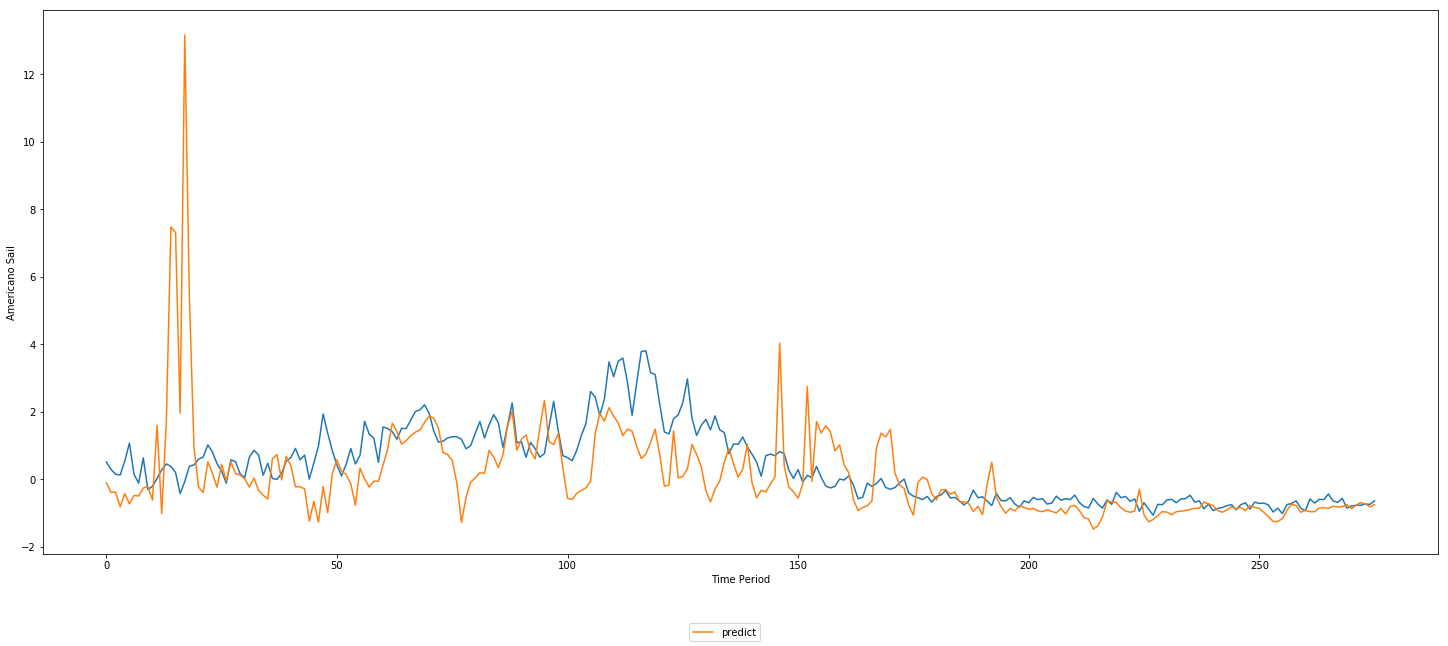

In [21]:
# Plot predictions
    ax = plt.figure(figsize = [25,10])
    plt.plot(testY[:,:])
    plt.plot(test_predict[:,:], label='predict')
    plt.xlabel("Time Period")
    plt.ylabel("Americano Sail")
    ax.legend(loc = 8)
    plt.show()